# Football Passing Distributions  - Champions League 2012,2013,2015,2016

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import csv
import re
import os
from networkx.drawing.nx_agraph import graphviz_layout
from bs4 import BeautifulSoup
import urllib2
import pickle
from pyPdf import PdfFileWriter, PdfFileReader
from collections import defaultdict
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import NMF
from itertools import chain
from sklearn.cluster import KMeans

## Single Game Data Visualisation

In [2]:
team = 0
team0, team1 = [],[]
team0na,team1na = [],[]
with open('Data\game1.csv','rb') as csvfile :
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        if row[0] != 'Total passes received:' and team == 0:
            name = re.sub("[0-9]", " ", row[0]).strip().decode('utf-8',"ignore")
            team0.append(name)
            team0na.append((name,row[-9],row[-8],row[-7],row[-6],row[-5],row[-4],row[-3],row[-2]))
        if row[0] == 'Total passes received:' :
            team = 1
        if row[0] != 'Total passes received:' and team == 1:
            name = re.sub("[0-9]", " ", row[0]).strip().decode('utf-8',"ignore")
            team1.append(name)

In [3]:
team = 0
team0_edges, team1_edges = [],[]
team0_edge_attr ={}
t0count,t1count = 0,0
with open('Data\game1.csv','rb') as csvfile :
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        if row[0] != 'Total passes received:' and team == 0:
            l1 = [team0[t0count]]*len(team0)
            for x in range(len(row)) :
                if row[x] == '-' or row[x] == '' :
                    row[x] = 0
            out = zip(l1,team0,row[3:len(team0)-3])
            t0count+=1
            team0_edges += out
        if row[0] == 'Total passes received:' :
            team = 1
        if row[0] != 'Total passes received:' and team == 1:
            pass

In [4]:
G = nx.DiGraph()

In [5]:
for x in team0na :
    G.add_node(x[0])#,Long_PC=x[1],Long_PA=x[2],Medium_PC=x[3],Medium_PA=x[4],Short_PC=x[5],Short_PA=x[6],Total_PC=x[7],Total_PA=x[8])
for x in team0_edges :
    G.add_edge(x[0],x[1],weight=int(x[2]))

In [6]:
nx.draw(G)

C:\Users\abhna\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\abhna\Anaconda2\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\abhna\Anaconda2\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

In [7]:
G.nodes()

[u'Yaroslav Rakitskiy',
 u'Luiz Adriano',
 u'Alex Teixeira',
 u'Ilsinho',
 u'Tom Hbschman',
 u'R?zvan Ra?',
 u'Olexandr Kucher',
 u'Marko Devi?',
 u'Henrik Mkhitaryan',
 u'Fernandinho',
 u'Willian',
 u'Douglas Costa',
 u'Darijo Srna',
 u'Andriy Pyatov']

In [8]:
plt.draw()

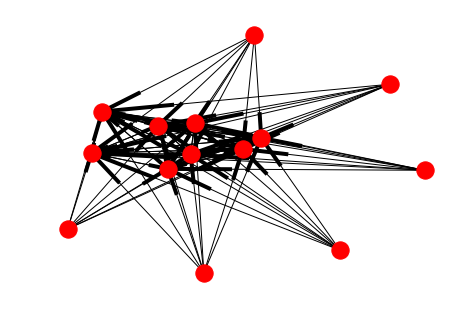

In [9]:
plt.show()

In [23]:
adj = nx.to_numpy_matrix(G)
model = NMF(n_components=4)
W = model.fit_transform(adj)
list(W[4])

[0.99681763430202142, 0.86406457791134483, 0.7014138803774933, 0.0]

In [126]:
a = nx.pagerank(G)
b = nx.centrality.closeness_centrality(G)
print a,b

{u'Yaroslav Rakitskiy': 0.010714285714285716, u'Luiz Adriano': 0.05290138463371911, u'Alex Teixeira': 0.010714285714285716, u'Ilsinho': 0.010714285714285716, u'Tom Hbschman': 0.16224184476040357, u'R?zvan Ra?': 0.08171759922724815, u'Olexandr Kucher': 0.14172200789729264, u'Marko Devi?': 0.010714285714285716, u'Henrik Mkhitaryan': 0.13158646458582407, u'Fernandinho': 0.15953779899241213, u'Willian': 0.16937934208342798, u'Douglas Costa': 0.010714285714285716, u'Darijo Srna': 0.010714285714285716, u'Andriy Pyatov': 0.03662784353395805} {u'Yaroslav Rakitskiy': 0.6153846153846154, u'Luiz Adriano': 0.5384615384615384, u'Alex Teixeira': 0.6153846153846154, u'Ilsinho': 0.6153846153846154, u'Tom Hbschman': 0.5384615384615384, u'Olexandr Kucher': 0.5384615384615384, u'R?zvan Ra?': 0.5384615384615384, u'Marko Devi?': 0.6153846153846154, u'Henrik Mkhitaryan': 0.5384615384615384, u'Fernandinho': 0.5384615384615384, u'Willian': 0.5384615384615384, u'Douglas Costa': 0.6153846153846154, u'Darijo Srn

## Overall Statistics - Data Available

In [2]:
files = os.listdir('CSVS')
totals = 0
count = 0
playerdict = defaultdict()
playercount = 0
for x in files :
    count += 1
    filename = 'CSVS\\'+ x
    with open(filename,'rb') as csvfile :
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader :
            if row[0] == 'Total passes received:' :
                totals+=int(row[-3])
            else :
                name = re.sub("[0-9]", " ", row[0]).strip().decode('utf-8',"ignore")
                playerdict[name] = {'height':0,'position':[]}
                playercount+=1
print totals,count,playercount,len(playerdict)

406958 986 13608 2178


In [66]:
# print playerdict

## Gather Player Position and Height from Google

In [29]:
# for player in playerdict :
#     temp =  player.encode("utf-8","ignore").replace(" ","+")
#     address = "http://www.google.com/search?q=" + temp + "+footballer+position"
#     request = urllib2.Request(address, None, {'User-Agent':'Mosilla/5.0 (Macintosh; Intel Mac OS X 10_7_4) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.57 Safari/536.11'})
#     urlfile = urllib2.urlopen(request)
#     page = urlfile.read()
#     soup = BeautifulSoup(page)
#     mydivs = soup.findAll("div", { "class" : "_XWk" })
#     mydivs1 = soup.findAll("div", { "class" : "title" })
#     positions = []
#     if len(mydivs)!=0 :
#         for x in mydivs :
#             p = str(x)
#             positions.append(re.split('>|<',p)[2])
#     else :
#         if len(mydivs1)!=0 :
#             for x in mydivs1 :
#                 p = str(x)
#                 positions.append(re.split('>|<',p)[2])
#     playerdict[player]['position'] = positions
    
#     address = "http://www.google.com/search?q=" + temp + "+footballer+height"
#     request = urllib2.Request(address, None, {'User-Agent':'Mosilla/5.0 (Macintosh; Intel Mac OS X 10_7_4) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.57 Safari/536.11'})
#     urlfile = urllib2.urlopen(request)
#     page = urlfile.read()
#     soup = BeautifulSoup(page)
#     mydivs = soup.findAll("div", { "class" : "_XWk" })
#     heights = 0
#     if len(mydivs)!=0 :
#         for x in mydivs :
#             p = str(x)
#             p = re.split('>|<| ',p)
#             try :
#                 heights = (float(p[3][0])+float(p[4][0])/(12.0))
#             except ValueError:
#                 heights = 0
#     playerdict[player]['height'] = heights
#     print player,playerdict[player]['height'],playerdict[player]['position']

In [71]:
# with open('player.pickle', 'wb') as handle:
#     pickle.dump(playerdict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
with open('player.pickle', 'rb') as handle:
    playerdict =  pickle.load(handle)

In [31]:
print playerdict['Lionel Messi']

{'closeness': 1.1070858166775097, 'height': 5.583333333333333, 'pagerank': 0.09973258861607952, 'Medium PC': 967, 'position': ['Forward'], 'Long PA': 138, 'Short PC': 618, 'Long PC': 100, 'Short PA': 779, 'betweeness': 0.0, 'Medium PA': 1157}


## Construct Rankings

In [5]:
season2012,season2013,season2015,season2016 = defaultdict(),defaultdict(),defaultdict(),defaultdict()
csvs = ['2012.csv','2013.csv','2015.csv','2016.csv']
for x in csvs :
    with open(x,'rb') as csvfile :
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader :
            if x == '2012.csv':
                try :
                    season2012[row[1]] = int(row[0])
                except ValueError :
                    pass
            elif x == '2013.csv':
                try :
                    season2013[row[1]] = int(row[0])
                except ValueError :
                    pass
            elif x == '2015.csv':
                try :
                    season2015[row[1]] = int(row[0])
                except ValueError :
                    pass
            else :
                try :
                    season2016[row[1]] = int(row[0])
                except ValueError:
                    pass

In [8]:
with open('season2012.pickle', 'wb') as handle:
    pickle.dump(season2012, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('season2013.pickle', 'wb') as handle:
    pickle.dump(season2013, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('season2015.pickle', 'wb') as handle:
    pickle.dump(season2015, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('season2016.pickle', 'wb') as handle:
    pickle.dump(season2016, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Bulding Player Statistics

In [25]:
# for a in playerdict :
#     playerdict[a]['Long PA'] = 1
#     playerdict[a]['Long PC'] = 1
#     playerdict[a]['Medium PA'] = 1
#     playerdict[a]['Medium PC'] = 1
#     playerdict[a]['Short PA'] = 1
#     playerdict[a]['Short PC'] = 1

In [ ]:
# files = os.listdir('CSVS')
# teamcount = 0
# for x in files :
#     count += 1
#     filename = 'CSVS\\'+ x
#     with open(filename,'rb') as csvfile :
#         reader = csv.reader(csvfile, delimiter=',')
#         for row in reader :
#             name = re.sub("[0-9]", " ", row[0]).strip().decode('utf-8',"ignore")
#             for x in range(len(row)) :
#                 if row[x] == '-' or row[x] == '' :
#                     row[x] = 0
#             if name not in playerdict or name == 'Total passes received:':
#                 teamcount+=1
#                 if name!='Total passes received:':
#                     print name
#             else :
#                 playerdict[name]['Long PA']+=int(row[-8])
#                 playerdict[name]['Long PC']+=int(row[-9])
#                 playerdict[name]['Medium PA']+=int(row[-6])
#                 playerdict[name]['Medium PC']+=int(row[-7])
#                 playerdict[name]['Short PA']+=int(row[-4])
#                 playerdict[name]['Short PC']+=int(row[-5])

## Player Positions - 1hot encoding

In [6]:
allpositions = set()
for x in playerdict :
    allpositions.update(playerdict[x]['position'])
print allpositions

set(['', 'Coach', 'Infielder', 'Defender', 'Forward', 'Midfielder', 'Goalkeeper', 'Winger'])


In [137]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [139]:
lb.fit(list(allpositions))

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

## Constructing the matrix - Baseline Model
###  Initial Feature Set to be used for link prediction
Player Height, Player Position, Receiver Position, Short Passes Accuracy, Medium Passes Accuracy, Long Passes Accuracy
Team Rank, Opposition Team Rank, Home or Away, Receiver Height, Time Player, Receiver Time Played

In [8]:
def playertype(a,b):
    if b in a:
        return 1
    else :
        return 0

In [36]:
files = os.listdir('CSVS')
teamdir = defaultdict()
buildgraphs = {}
out =[]
count = 0
for x in files :
    count+=1
    filename = 'CSVS\\'+ x
    pdfname = re.sub("team[0-1].csv",".pdf",x)
    pdfpath = 'Data\\'+pdfname
    with open(pdfpath,'rb') as f:
        temp = PdfFileReader(f)
        team = temp.getDocumentInfo().title
    buildgraphs[x] = []
    #Team Creation
    if 'team0' in x and team!=None:
        my_team = team.split("_")[2]
        opp_team = team.split("_")[3]
        homeoraway = 1
    elif team!=None :
        my_team = team.split("_")[3]
        opp_team = team.split("_")[2]
        homeoraway = 0
    #Rank Selection
    if '2009' in x :
        if my_team in season2012 :
            my_rank = season2012[my_team]
        else :
            my_rank = 100
        if opp_team in season2012 :
            opp_rank = season2012[opp_team]
        else :
            opp_rank = 100
    elif '2011' in x :
        if my_team in season2013 :
            my_rank = season2013[my_team]
        else :
            my_rank = 100
        if opp_team in season2013 :
            opp_rank = season2013[opp_team]
        else :
            opp_rank = 100
    elif '2015' in x :
        if my_team in season2015 :
            my_rank = season2015[my_team]
        else :
            my_rank = 100
        if opp_team in season2015 :
            opp_rank = season2015[opp_team]
        else :
            opp_rank = 100
    elif '2019' in x :
        if my_team in season2016 :
            my_rank = season2016[my_team]
        else :
            my_rank = 100
        if opp_team in season2016 :
            opp_rank = season2016[opp_team]
        else :
            opp_rank = 100
    
    ptcount = 0
    tplayers = []
    
    #Using 1 hot encoding
    isdefender, isinfielder, isforward,ismidfielder,isgoalkeeper,iswinger =[],[],[],[],[],[]
    timeplayed = []
    passheight = []
    with open(filename,'rb') as csvfile :
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader :
            if row[0] != 'Total passes received:':
                name = re.sub("[0-9]", " ", row[0]).strip().decode('utf-8',"ignore")
                tplayers.append(name)
                isdefender.append(playertype(playerdict[name]['position'],'Defender'))
                isforward.append(playertype(playerdict[name]['position'],'Forward'))
                ismidfielder.append(playertype(playerdict[name]['position'],'Midfielder'))
                isgoalkeeper.append(playertype(playerdict[name]['position'],'Goalkeeper'))
                isinfielder.append(playertype(playerdict[name]['position'],'Infielder'))
                iswinger.append(playertype(playerdict[name]['position'],'Winger'))
                passheight.append(playerdict[name]['height'])
                try :
                    timeplayed.append(int(re.split(r"\'",row[1])[0]))
                except ValueError:
                    timeplayed.append(1)
                    
    print x,count,len(out)
    
    with open(filename,'rb') as csvfile :
        reader = csv.reader(csvfile, delimiter=',')
        partial_out = []
        for row in reader :
            if row[0] != 'Total passes received:' and row[0]!=None:
                playerlist = [tplayers[ptcount]]*len(tplayers)
                try :
                    mytimeplayed = [int(re.split(r"\'",row[1])[0])]*len(tplayers)
                except ValueError:
                    mytimeplayed = [0]*len(tplayers)
                my_teamlist = [my_team]*len(tplayers)
                mydefender = [playertype(playerdict[tplayers[ptcount]]['position'],'Defender')]*len(tplayers)
                mymidfielder = [playertype(playerdict[tplayers[ptcount]]['position'],'Midfielder')]*len(tplayers)
                mywinger = [playertype(playerdict[tplayers[ptcount]]['position'],'Winger')]*len(tplayers)
                myforward = [playertype(playerdict[tplayers[ptcount]]['position'],'Forward')]*len(tplayers)
                myinfielder = [playertype(playerdict[tplayers[ptcount]]['position'],'Infielder')]*len(tplayers)
                mygoalkeeper = [playertype(playerdict[tplayers[ptcount]]['position'],'Goalkeeper')]*len(tplayers)
                my_ranklist = [my_rank]*len(tplayers)
                opp_ranklist = [opp_rank]*len(tplayers)
                height_list = [playerdict[tplayers[ptcount]]['height']]*len(tplayers)
                prlist = [playerdict[tplayers[ptcount]]['pagerank']]*len(tplayers)
                cllist = [playerdict[tplayers[ptcount]]['closeness']]*len(tplayers)
                btlist = [playerdict[tplayers[ptcount]]['betweeness']]*len(tplayers)
                homeoraway_list = [homeoraway]*len(tplayers)
                shortpa_accuracy = float(float(playerdict[tplayers[ptcount]]['Short PC'])/float(playerdict[tplayers[ptcount]]['Short PA']))
                mediumpa_accuracy = float(float(playerdict[tplayers[ptcount]]['Medium PC'])/float(playerdict[tplayers[ptcount]]['Medium PA']))
                longpa_accuracy = float(float(playerdict[tplayers[ptcount]]['Long PC'])/float(playerdict[tplayers[ptcount]]['Long PA']))
                percentlong = float(playerdict[tplayers[ptcount]]['Long PC'])/(float(playerdict[tplayers[ptcount]]['Long PC']) + float(playerdict[tplayers[ptcount]]['Medium PC']) + float(playerdict[tplayers[ptcount]]['Short PC']))
                percentmedium = float(playerdict[tplayers[ptcount]]['Medium PC'])/(float(playerdict[tplayers[ptcount]]['Long PC']) + float(playerdict[tplayers[ptcount]]['Medium PC']) + float(playerdict[tplayers[ptcount]]['Short PC']))
                percentshort = float(playerdict[tplayers[ptcount]]['Short PC'])/(float(playerdict[tplayers[ptcount]]['Long PC']) + float(playerdict[tplayers[ptcount]]['Medium PC']) + float(playerdict[tplayers[ptcount]]['Short PC']))
                shortpa_list = [shortpa_accuracy]*len(tplayers)
                mediumpa_list = [mediumpa_accuracy]*len(tplayers)
                longpa_list = [longpa_accuracy]*len(tplayers)
                plonglist = [percentlong]*len(tplayers)
                pmediumlist = [percentmedium]*len(tplayers)
                pshortlist = [percentshort]*len(tplayers)
#                 playerfeatures = list(playerdata[tplayers[ptcount]]['totals'][0])
#                 myteamfeatures = list(teamdata[my_team]['features'][0])
#                 oppteamfeatures = list(teamdata[opp_team]['features'][0])
                for q in range(len(row)) :
                    if row[q] == '-' or row[q] == '' :
                        row[q] = 0
                buildgraphs[x].extend(zip(playerlist,tplayers,row[3:len(tplayers)+3],my_ranklist,opp_ranklist,mytimeplayed,my_teamlist))
                temp_out = zip(shortpa_list,mediumpa_list,longpa_list,plonglist,pshortlist,pmediumlist,mydefender,mymidfielder,mywinger,myforward,myinfielder,mygoalkeeper,my_ranklist,mytimeplayed,timeplayed,opp_ranklist,height_list,passheight,homeoraway_list,isdefender,isinfielder,ismidfielder,isgoalkeeper,iswinger,isforward,prlist,cllist,btlist,row[3:len(tplayers)+3])
#                 temp1_out = []
#                 for x in temp_out :
#                     x = list(x)
#                     x[-2:-2] = playerdict[tplayers[ptcount]]['features']
#                     #x[-2:-2] = myteamfeatures
#                     #x[-2:-2] = oppteamfeatures
#                     temp1_out.append(x)
            ptcount+=1
            partial_out += temp_out
    out += partial_out
        

C:\Users\abhna\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
C:\Users\abhna\Anaconda2\lib\site-packages\ipykernel\__main__.py:26: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


2009488_tpdteam0.csv 1 0
2009488_tpdteam1.csv 2 210
2009489_tpdteam0.csv 3 420
2009489_tpdteam1.csv 4 602
2009490_tpdteam0.csv 5 812
2009490_tpdteam1.csv 6 1022
2009491_tpdteam0.csv 7 1232
2009491_tpdteam1.csv 8 1442
2009492_tpdteam0.csv 9 1652
2009492_tpdteam1.csv 10 1862
2009493_tpdteam0.csv 11 2072
2009493_tpdteam1.csv 12 2254
2009494_tpdteam0.csv 13 2464
2009494_tpdteam1.csv 14 2674
2009496_tpdteam0.csv 15 2884
2009496_tpdteam1.csv 16 3094
2009497_tpdteam0.csv 17 3304
2009497_tpdteam1.csv 18 3514
2009498_tpdteam0.csv 19 3724
2009498_tpdteam1.csv 20 3934
2009499_tpdteam0.csv 21 4144
2009499_tpdteam1.csv 22 4354
2009500_tpdteam0.csv 23 4564
2009500_tpdteam1.csv 24 4774
2009501_tpdteam0.csv 25 4984
2009501_tpdteam1.csv 26 5194
2009502_tpdteam0.csv 27 5404
2009502_tpdteam1.csv 28 5614
2009503_tpdteam0.csv 29 5796
2009503_tpdteam1.csv 30 6006
2009504_tpdteam0.csv 31 6216
2009504_tpdteam1.csv 32 6426
2009505_tpdteam0.csv 33 6636
2009505_tpdteam1.csv 34 6846
2009506_tpdteam0.csv 35 7042
2

2011787_tpdteam1.csv 304 62145
2011788_tpdteam0.csv 305 62355
2011788_tpdteam1.csv 306 62565
2011789_tpdteam0.csv 307 62775
2011789_tpdteam1.csv 308 62985
2011790_tpdteam0.csv 309 63167
2011790_tpdteam1.csv 310 63377
2011791_tpdteam0.csv 311 63587
2011791_tpdteam1.csv 312 63797
2011792_tpdteam0.csv 313 64007
2011792_tpdteam1.csv 314 64189
2011793_tpdteam0.csv 315 64399
2011793_tpdteam1.csv 316 64609
2011794_tpdteam0.csv 317 64819
2011794_tpdteam1.csv 318 65029
2011795_tpdteam0.csv 319 65239
2011795_tpdteam1.csv 320 65449
2011796_tpdteam0.csv 321 65659
2011796_tpdteam1.csv 322 65869
2011797_tpdteam0.csv 323 66079
2011797_tpdteam1.csv 324 66261
2011798_tpdteam0.csv 325 66471
2011798_tpdteam1.csv 326 66681
2011799_tpdteam0.csv 327 66891
2011799_tpdteam1.csv 328 67101
2011800_tpdteam0.csv 329 67311
2011800_tpdteam1.csv 330 67521
2011801_tpdteam0.csv 331 67731
2011801_tpdteam1.csv 332 67941
2011802_tpdteam0.csv 333 68151
2011802_tpdteam1.csv 334 68361
2011803_tpdteam0.csv 335 68571
2011803_

2015701_tpdteam1.csv 570 116835
2015702_tpdteam0.csv 571 117045
2015702_tpdteam1.csv 572 117227
2015703_tpdteam0.csv 573 117383
2015703_tpdteam1.csv 574 117593
2015704_tpdteam0.csv 575 117803
2015704_tpdteam1.csv 576 118013
2015705_tpdteam0.csv 577 118169
2015705_tpdteam1.csv 578 118351
2015706_tpdteam0.csv 579 118533
2015706_tpdteam1.csv 580 118743
2015707_tpdteam0.csv 581 118925
2015707_tpdteam1.csv 582 119135
2015708_tpdteam0.csv 583 119345
2015708_tpdteam1.csv 584 119555
2015709_tpdteam0.csv 585 119765
2015709_tpdteam1.csv 586 119975
2015710_tpdteam0.csv 587 120185
2015710_tpdteam1.csv 588 120395
2015711_tpdteam0.csv 589 120605
2015711_tpdteam1.csv 590 120815
2015712_tpdteam0.csv 591 121025
2015712_tpdteam1.csv 592 121235
2015713_tpdteam0.csv 593 121445
2015713_tpdteam1.csv 594 121655
2015714_tpdteam0.csv 595 121865
2015714_tpdteam1.csv 596 122075
2015715_tpdteam0.csv 597 122257
2015715_tpdteam1.csv 598 122467
2015716_tpdteam0.csv 599 122677
2015716_tpdteam1.csv 600 122887
2015717_

2019342_tpdteam0.csv 867 177361
2019342_tpdteam1.csv 868 177543
2019343_tpdteam0.csv 869 177699
2019343_tpdteam1.csv 870 177909
2019344_tpdteam0.csv 871 178119
2019344_tpdteam1.csv 872 178329
2019345_tpdteam0.csv 873 178539
2019345_tpdteam1.csv 874 178749
2019346_tpdteam0.csv 875 178931
2019346_tpdteam1.csv 876 179113
2019347_tpdteam0.csv 877 179323
2019347_tpdteam1.csv 878 179533
2019348_tpdteam0.csv 879 179743
2019348_tpdteam1.csv 880 179953
2019349_tpdteam0.csv 881 180163
2019349_tpdteam1.csv 882 180373
2019350_tpdteam0.csv 883 180583
2019350_tpdteam1.csv 884 180793
2019351_tpdteam0.csv 885 181003
2019351_tpdteam1.csv 886 181185
2019352_tpdteam0.csv 887 181367
2019352_tpdteam1.csv 888 181577
2019353_tpdteam0.csv 889 181787
2019353_tpdteam1.csv 890 181969
2019354_tpdteam0.csv 891 182179
2019354_tpdteam1.csv 892 182389
2019355_tpdteam0.csv 893 182571
2019355_tpdteam1.csv 894 182781
2019356_tpdteam0.csv 895 182991
2019356_tpdteam1.csv 896 183201
2019357_tpdteam0.csv 897 183411
2019357_

In [10]:
# with open('matrixdata', 'wb') as handle:
#     pickle.dump(out, handle, protocol=pickle.HIGHEST_PROTOCOL)
# # with open('buildgraphs', 'wb') as handle:
# #     pickle.dump(buildgraphs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [308]:
with open('matrixdata', 'rb') as handle:
    out = pickle.load(handle)
with open('buildgraphs', 'rb') as handle:
    buildgraphs = pickle.load(handle)

In [37]:
shuffle(out)
print len(out)

201591


In [38]:
trial = np.matrix(out[:160000])
test = np.matrix(out[160000:])

In [39]:
trial.shape

(160000L, 29L)

In [40]:
print trial[0][0]

[['1.0' '0.727272727273' '1.0' '0.0909090909091' '0.181818181818'
  '0.727272727273' '0' '1' '0' '0' '0' '0' '8' '14' '94' '25'
  '5.08333333333' '6.5' '0' '1' '0' '0' '0' '0' '0' '0.462624748996'
  '26.2857142857' '0.0' '1']]


In [46]:
x,y = np.split(trial,[28],axis=1)
x = x.astype('float')
y = y.astype('float')
print x[0]
print y[0]

[[  1.00000000e+00   7.27272727e-01   1.00000000e+00   9.09090909e-02
    1.81818182e-01   7.27272727e-01   0.00000000e+00   1.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    8.00000000e+00   1.40000000e+01   9.40000000e+01   2.50000000e+01
    5.08333333e+00   6.50000000e+00   0.00000000e+00   1.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   4.62624749e-01   2.62857143e+01   0.00000000e+00]]
[[ 1.]]


In [93]:
with open('matrixX', 'wb') as handle:
    pickle.dump(x, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('matrixY', 'wb') as handle:
    pickle.dump(y, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [47]:
theta,residuals,rank,s = np.linalg.lstsq(x, y)

In [48]:
print theta.transpose()
#Features - mydefender,mymidfielder,mywinger,myforward,myinfielder,mygoalkeeper,my_ranklist,mytimeplayed,timeplayed,opp_ranklist,height_list,passheight,homeoraway_list,shortpa_list,mediumpa_list,longpa_list,isdefender,isinfielder,ismidfielder,isgoalkeeper,iswinger,isforward

[[  1.44431464e+00   1.07141474e+00   9.85854826e-01  -6.52441074e+00
   -6.38437980e+00  -4.32343208e+00  -9.58624600e-03   1.83588166e-01
   -2.53266984e-01  -3.50872255e-01  -1.20285682e+00  -1.09436677e+00
   -5.08960334e-03   2.85742187e-02   2.84588199e-02   4.11959697e-03
    2.95711645e-02   2.30456615e-02   6.60318040e-02  -1.59579216e-01
    1.16031451e+00   3.26543680e-01  -1.84768565e+00  -1.60856512e-01
   -3.74594928e-01   4.34401861e+00  -5.45396432e-02   0.00000000e+00]]


In [18]:
print residuals

[]


In [49]:
testx,testy = np.split(test,[28],axis=1)
testx = testx.astype('float')
testy = testy.astype('float')
predicttesty = np.matmul(testx,theta)
mean_squared_error(testy,predicttesty)
zero = np.zeros((41591,1))
mean_squared_error(testy,zero)
total = float(sum(y)*1.0/len(y))
total = [total]*len(predicttesty)
print mean_squared_error(total,testy)
print mean_squared_error(zero,testy)
print r2_score(testy,predicttesty)
print r2_score(testy,total)
print r2_score(testy,zero)

10.7724537059
15.0158447741
0.236032852862
-2.43612766835e-05
-0.393945241184


In [50]:
gbr = GradientBoostingRegressor()
gbr.fit(x,y)
gbrpredict = gbr.predict(testx)
for a in gbrpredict:
    if a<0 :
        a=0
print gbr.score(testx,gbrpredict)

1.0


In [51]:
print r2_score(testy,gbrpredict)
print mean_squared_error(testy,gbrpredict)

0.315167829148
7.37714314021


In [52]:
rf = RandomForestRegressor()
rf.fit(x,y)
rfpredict = rf.predict(testx)
for a in rfpredict :
    if a<0 :
        a=0
print rf.score(testx,rfpredict)
print r2_score(testy,rfpredict)
print mean_squared_error(testy,rfpredict)

C:\Users\abhna\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


1.0
0.303650495545
7.50121006084


In [53]:
baselinex,throw = np.split(x,[6],axis=1)
baselinetestx,throw = np.split(testx,[6],axis=1)
gbrbase = GradientBoostingRegressor()
gbrbase.fit(baselinex,y)
gbrbasepredict = gbrbase.predict(baselinetestx)
for a in gbrbasepredict:
    if a<0 :
        a=0
print gbrbase.score(baselinetestx,gbrbasepredict)
print r2_score(testy,gbrbasepredict)
print mean_squared_error(testy,gbrbasepredict)

1.0
0.0954888731018
9.74356687528


In [241]:
np.var(y)

10.684271977500002

In [ ]:
# clf = Ridge(alpha=1.0)
# clf.fit(x,y)

In [13]:
# predicty = clf.predict(x)
# mean_squared_error(y,predicty)
# print r2_score()

8.4841626164410417

In [14]:
# predicty = np.around(predicty)
# mean_absolute_error(y,predicty)

1.8943057973818276

In [ ]:
# svr = SVR()
# svr.fit(x,y)

In [ ]:
# svrpredicty = svr.predict(x)
# mean_squared_error(y,svrpredicty)
# svrpredicty = np.around(svrpredicty)
# mean_absolute_error(y,svrpredicty)

In [23]:
plt.plot(range(len(predicty)),predicty)

In [24]:
plt.plot(range(len(y)),y)

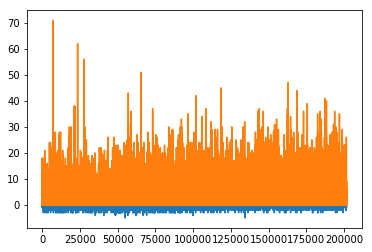

In [25]:
plt.show()

In [28]:
# Build Graphs and get Centralities
playergraphdata = {}
playerdata = {}
teamdata = {}
count = 0
edgedict = {}
for x in playerdict:
    playergraphdata[x] = []
    playerdata[x] = {}
    playerdata[x]['totals'] = np.zeros((1,4))
    playerdata[x]['length'] = 0

for x in buildgraphs:
    G = nx.DiGraph()
    timepl = {}
    mrank = {}
    orank = {}
    for a in buildgraphs[x] :
#         if G.has_edge(a[0],a[1]):
#             G[a[0]][a[1]]['weight']+=int(a[2])
#             edgedict[(a[0],a[1])] +=1
#         else :
        G.add_edge(a[0],a[1],weight=int(a[2]))
#             edgedict[(a[0],a[1])] =1
        count+=int(a[2])
        timepl[a[0]] = int(a[5])
        mrank[a[0]] = int(a[3])
        orank[a[0]] = int(a[4])
        my_team = a[6]
    pgc = nx.pagerank(G)
    closec = nx.closeness_centrality(G)
    betweenc = nx.betweenness_centrality(G)
    players = G.nodes()
#     adj = nx.to_numpy_matrix(G)
#     model = NMF(n_components=4)
#     W = model.fit_transform(adj)
#     teamf = NMF(n_components=1)
#     teamf.fit(adj)
#     features = list(teamf.components_[0])[:14]
#     print len(features)
#     if len(features)<14 :
#         while len(features)<14:
#             features.extend([0])
#         print "After Correction", len(features)
    for m in range(len(players)) :
        playergraphdata[players[m]].append((pgc[players[m]],closec[players[m]],betweenc[players[m]],timepl[players[m]],mrank[players[m]],orank[players[m]]))
        
#         playerdata[players[m]]['totals'] = np.add(playerdata[players[m]]['totals'],W[m])
#         playerdata[players[m]]['length']+=1
#     if my_team in teamdata :
#         teamdata[my_team]['features'] = np.add(teamdata[my_team]['features'],features)
#         teamdata[my_team]['length'] +=1
#     else :
#         teamdata[my_team] = {}
#         teamdata[my_team]['features'] = np.add(np.zeros((1,14)),features)
#         teamdata[my_team]['length'] =1        

C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node Oguzhan Aynaoglu
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node Andrija Pavlovi?
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node Laurent Bonnart
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node Nolan Roux
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node Vitinho
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: 

C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node Paul Pogba
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node Klber
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node Roman Kienast
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node Admir Mehmedi
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node Manuel da Costa
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarn

C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node Robbie Kruse
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node Tony Watt
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node Filip Benkovi?
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node orz Krychowiak
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node Vincent Kompany
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: 

C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node Mario Musa
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node ?ukasz Teodorczyk
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node Carlos Strandberg
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node Cristian Rodrguez
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node Mariano Daz
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic

In [304]:
for x in teamdata:
    teamdata[x]['features'] = teamdata[x]['features']/teamdata[x]['length']
    teamdata[x]['length'] = 1
for x in playerdata :
    playerdata[x]['totals'] = playerdata[x]['totals']/playerdata[x]['length']
    playerdata[x]['length'] = 1

C:\Users\abhna\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in divide


## Refined Player Data

In [33]:
for x in playergraphdata :
    b,c,p = 0,0,0
    for a in playergraphdata[x]:
        try :
            p+= a[0]*1.0*92.0/a[3]
            c+= a[1]*1.0*92.0/a[3]
            b+= a[2]*1.0*92.0/a[3]
        except ZeroDivisionError :
            p+= a[0]*1.0*92.0/1.0
            c+= a[1]*1.0*92.0/1.0
            b+= a[2]*1.0*92.0/1.0
    p = p*1.0/len(playergraphdata[x])
    c = c*1.0/len(playergraphdata[x])
    b = b*1.0/len(playergraphdata[x])
    playerdict[x]['pagerank'] = p
    playerdict[x]['closeness'] = c
    playerdict[x]['betweeness'] = b

In [35]:
print playergraphdata['Lionel Messi']
print playerdict['Lionel Messi']

[(0.08738117395574765, 1.0, 0.0, 94, 3, 5), (0.12321290592165778, 1.0, 0.0, 94, 3, 10), (0.10670174686653369, 1.0, 0.0, 94, 27, 4), (0.08191913208878229, 1.0, 0.0, 95, 27, 4), (0.09624530843944411, 1.0, 0.0, 93, 27, 4), (0.10303486048196261, 1.0, 0.0, 93, 2, 22), (0.10635742037831687, 1.0, 0.0, 95, 3, 47), (0.07614321940360068, 1.0, 0.0, 96, 1, 9), (0.11598645017806959, 1.0, 0.0, 95, 3, 12), (0.07771574643458783, 1.0, 0.0, 94, 2, 30), (0.10440394868404522, 1.0, 0.0, 90, 3, 51), (0.08249506391724423, 1.0, 0.0, 96, 3, 4), (0.11059975294194807, 1.0, 0.0, 92, 2, 11), (0.1027740354060679, 1.0, 0.0, 94, 1, 62), (0.1293571873215685, 1.0, 0.0, 94, 3, 5), (0.11866182350123007, 1.0, 0.0, 92, 3, 47), (0.08003076586947525, 1.0, 0.0, 94, 2, 7), (0.07902662208866665, 1.0, 0.0, 94, 1, 58), (0.10693037417311767, 1.0, 0.0, 95, 3, 18), (0.030514411291768705, 1.0, 0.0, 37, 1, 9), (0.06703038208259171, 1.0, 0.0, 46, 27, 4), (0.08202303558048367, 1.0, 0.0, 94, 3, 100), (0.08505538908161939, 1.0, 0.0, 95, 1

In [184]:
degree_sequence=sorted(nx.degree(G).values(),reverse=True) # degree sequence

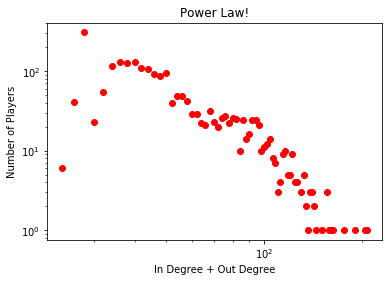

In [216]:
helpplot = {}
for x in degree_sequence :
    if x in helpplot:
        helpplot[x]+=1
    else :
        helpplot[x]=1
lists = sorted(helpplot.items())
x, y = zip(*lists)
plt.ylabel('Number of Players')
plt.xlabel('In Degree + Out Degree')
plt.title('Power Law!')
plt.loglog(x,y,'ro')
plt.show()

In [317]:
G.number_of_edges()

56776

In [318]:
page = nx.pagerank(G)
bet = nx.betweenness_centrality(G)
close = nx.closeness_centrality(G)
for x in playerdict:
    playerdict[x]['pagerank'] = page[x]
    playerdict[x]['closeness'] = close[x]
    playerdict[x]['betweeness'] = bet[x]

C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node Marvin Schulz
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node ksim Kanunnikov
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node Anders Christiansen
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node Georg Margreitter
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\abhna\Anaconda2\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node orten Nordstrand
  warnings.warn('zero out-degree for node %s' % u)


In [195]:
player = G.nodes()
adj = nx.to_numpy_matrix(G)
ind = player.index('Lionel Messi')

1590


In [320]:
adj = nx.to_numpy_matrix(G)
model = NMF(n_components=4)
W = model.fit_transform(adj)

In [321]:
count = 0
for x in player:
    playerdict[x]['features'] = list(W[count])
    count+=1

In [322]:
playerdict['Lionel Messi']

{'Long PA': 138,
 'Long PC': 100,
 'Medium PA': 1157,
 'Medium PC': 967,
 'Short PA': 779,
 'Short PC': 618,
 'betweeness': 0.0021951010540888893,
 'closeness': 0.2874423951343643,
 'features': [0.0, 0.0, 1.7683824814036708, 0.0],
 'height': 5.583333333333333,
 'pagerank': 0.0012244714603758483,
 'position': ['Forward']}

In [329]:
okay = KMeans(n_clusters=10)
okay = okay.fit_predict(W)

In [330]:
clubbings = {}
for x in range(len(player)):
    if okay[x] in clubbings :
        name = player[x]
        clubbings[okay[x]].append(name)
    else :
        clubbings[okay[x]] = []

In [331]:
for x in clubbings:
    print len(clubbings[x])

1935
0
0
16
10
85
22
23
56
21


In [310]:
# for x in clubbings :
#     print len(clubbings[x])

In [347]:
print clubbings[0]

[u'Aleksei Evseev', u'Rachid Ghezzal', u'dwig Augustinsson', u'Mauricio Isla', u'Kurt Zouma', u'Natanael', u'Bjrn Engels', u'Mathias Jrgensen', u'Wilfrid Kaptoum', u'Ryan Bertrand', u'hristian Clemens', u'Josip Drmic', u'heslav Shevchuk', u'cheslav Malafeev', u'ha? Kucharczyk', u'ariano Ferreira', u'Matz Sels', u'Olexandr Kucher', u'Moritz Leitner', u'Gastn Pereiro', u'Emre olak', u'erick Aubameyang', u'ikhail Gordeichuk', u'Camora', u'Thomas', u'Helton', u'italiy Buyalskiy', u'Aldo Kalulu', u'Tomas Simkovic', u'Lazar Markovi?', u'Vadis Odjidja', u'ksandr Gatskan', u'Luka Djordjevi?', u'athieu Valbuena', u'Timmy Simons', u'Praxitelis Vouros', u'Georgi Zhukov', u'David Fuster', u'ackson Martinez', u'Maciej Rybus', u'Jordan Ferri', u'Carlos Vela', u'Hamit Alt?ntop', u'Alexis Snchez', u'Jlio Baptista', u'Christian Maggio', u'Youri Tielemans', u'Claudio Pizarro', u'Roberto Pereyra', u'Robin Olsen', u'Iasmin Latovlevici', u'Ryan Mendes', u'lambos Lykogiannis', u'Leigh Griffiths', u'Jes', u'

In [316]:
for x in edgedict:
    G[x[0]][x[1]]['weight'] = G[x[0]][x[1]]['weight']/int(edgedict[x])